In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

In [2]:
mergin_cleaned_df = pd.read_csv('merged_cleaned_agg_outliers_obs_datasets.csv')
mergin_cleaned_df.head()

,state,longitude,latitude,light_intensity,year,observations,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,bahia,-46.495833,-11.220833,0.380000,2020,3,POINT (-46.4958332253 -11.2208334231),4112093,2101311011101333,2863,4787,58,1,1
1,bahia,-46.495833,-11.216667,0.310000,2020,3,POINT (-46.4958332253 -11.2166667564),4112093,2101311011101333,2863,4787,58,1,1
2,bahia,-46.341667,-11.287500,1.050000,2020,3,POINT (-46.3416665574 -11.2875000903),4112117,2101311100021211,3693,2279,27,3,1
3,bahia,-46.337500,-11.287500,0.683333,2020,3,POINT (-46.3374998907 -11.2875000903),4112118,2101311100021300,634,417,43,8,1
4,bahia,-46.337500,-11.283333,0.440000,2020,3,POINT (-46.3374998907 -11.283333423599998),4112116,2101311100021122,708,418,25,2,1


In [4]:
# # Hypothesis Testing
# if 'GDP_per_capita' not in mergin_cleaned_df.columns:
#     print("Error: No economic development metric ('GDP_per_capita') found in the dataset.")
#     raise ValueError("Economic development data is required for hypothesis testing.")

# features = ['radiance_pct_change', 'avg_d_kbps', 'avg_u_kbps']
# if any(feature not in mergin_cleaned_df.columns for feature in features):
#     print("Error: One or more independent variables are missing in the dataset.")
#     raise ValueError("Ensure all independent variables are present: radiance_pct_change, avg_d_kbps, avg_u_kbps.")

# dependent_variable = mergin_cleaned_df['GDP_per_capita']
# independent_variables = mergin_cleaned_df[features]

# independent_variables = sm.add_constant(independent_variables)

# model = sm.OLS(dependent_variable, independent_variables).fit()

# print(model.summary())

# print("\nCorrelation Analysis:")
# for feature in features:
#     correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['GDP_per_capita'])
#     print(f"{feature} vs GDP_per_capita: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

# print("\nInterpretation:")
# print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")
# print("- This would indicate that changes in nighttime light intensity and internet speeds are significantly associated with economic development.")

In [8]:
# Create a Derived Metric for Economic Development
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

# Select relevant features
features = ['light_intensity', 'avg_d_kbps']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

# Add a constant to the independent variables for regression
independent_variables = sm.add_constant(independent_variables)

# Perform Linear Regression
model = sm.OLS(dependent_variable, independent_variables).fit()

# Display regression summary
print(model.summary())

# Correlation Analysis
print("\nCorrelation Analysis:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

# Interpret Results
print("\nInterpretation:")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")
print("- This would indicate that changes in nighttime light intensity and internet speeds are significantly associated with economic development.")


                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.234
Model:                                 OLS   Adj. R-squared:                  0.234
Method:                      Least Squares   F-statistic:                 1.313e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:19:32   Log-Likelihood:            -1.3172e+06
No. Observations:                    85860   AIC:                         2.634e+06
Df Residuals:                        85857   BIC:                         2.634e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [9]:
# Create a Derived Metric for Economic Development
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

# Create polynomial features
mergin_cleaned_df['light_intensity_squared'] = mergin_cleaned_df['light_intensity'] ** 2

# Select relevant features
# Include the squared term in the model

# features = ['light_intensity', 'avg_d_kbps']
features = ['light_intensity', 'light_intensity_squared', 'avg_d_kbps']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

# Add a constant to the independent variables for regression
independent_variables = sm.add_constant(independent_variables)

# Perform Linear Regression
model = sm.OLS(dependent_variable, independent_variables).fit()

# Display regression summary
print(model.summary())

# Correlation Analysis
print("\nCorrelation Analysis:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

# Interpret Results
print("\nInterpretation:")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")
print("- This would indicate that changes in nighttime light intensity and internet speeds are significantly associated with economic development.")


                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.286
Model:                                 OLS   Adj. R-squared:                  0.286
Method:                      Least Squares   F-statistic:                 1.145e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:19:36   Log-Likelihood:            -1.3142e+06
No. Observations:                    85860   AIC:                         2.628e+06
Df Residuals:                        85856   BIC:                         2.628e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [10]:
# Create a Derived Metric for Economic Development
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

# Apply log transformation to avg_d_kbps if needed
mergin_cleaned_df['log_avg_d_kbps'] = np.log(mergin_cleaned_df['avg_d_kbps'])

# Select relevant features
features = ['light_intensity', 'avg_d_kbps']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

# Add a constant to the independent variables for regression
independent_variables = sm.add_constant(independent_variables)

# Perform Linear Regression
model = sm.OLS(dependent_variable, independent_variables).fit()

# Display regression summary
print(model.summary())

# Correlation Analysis
print("\nCorrelation Analysis:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

# Interpret Results
print("\nInterpretation:")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")
print("- This would indicate that changes in nighttime light intensity and internet speeds are significantly associated with economic development.")


                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.234
Model:                                 OLS   Adj. R-squared:                  0.234
Method:                      Least Squares   F-statistic:                 1.313e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:19:40   Log-Likelihood:            -1.3172e+06
No. Observations:                    85860   AIC:                         2.634e+06
Df Residuals:                        85857   BIC:                         2.634e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [11]:
# Create a Derived Metric for Economic Development
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

# Create interaction term between light_intensity and avg_d_kbps
mergin_cleaned_df['light_intensity_x_avg_d_kbps'] = (
    mergin_cleaned_df['light_intensity'] * mergin_cleaned_df['avg_d_kbps']
)

# Select relevant features

# features = ['light_intensity', 'avg_d_kbps']
features = ['light_intensity', 'avg_d_kbps', 'light_intensity_x_avg_d_kbps']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

# Add a constant to the independent variables for regression
independent_variables = sm.add_constant(independent_variables)

# Perform Linear Regression
model = sm.OLS(dependent_variable, independent_variables).fit()

# Display regression summary
print(model.summary())

# Correlation Analysis
print("\nCorrelation Analysis:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

# Interpret Results
print("\nInterpretation:")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")
print("- This would indicate that changes in nighttime light intensity and internet speeds are significantly associated with economic development.")


                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.354
Model:                                 OLS   Adj. R-squared:                  0.354
Method:                      Least Squares   F-statistic:                 1.571e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:19:46   Log-Likelihood:            -1.3099e+06
No. Observations:                    85860   AIC:                         2.620e+06
Df Residuals:                        85856   BIC:                         2.620e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = mergin_cleaned_df[features]
y = mergin_cleaned_df['Internet_Activity_Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluate the model
print(f"Random Forest R-squared: {rf_model.score(X_test, y_test):.2f}")

Random Forest R-squared: 0.39


In [13]:
from sklearn.linear_model import Lasso

# Train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Evaluate the model
print(f"Lasso R-squared: {lasso_model.score(X_test, y_test):.2f}")


Lasso R-squared: 0.35


In [14]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
# print(f"Cross-validation scores: {scores}")


InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000013EEF21A480> instead.

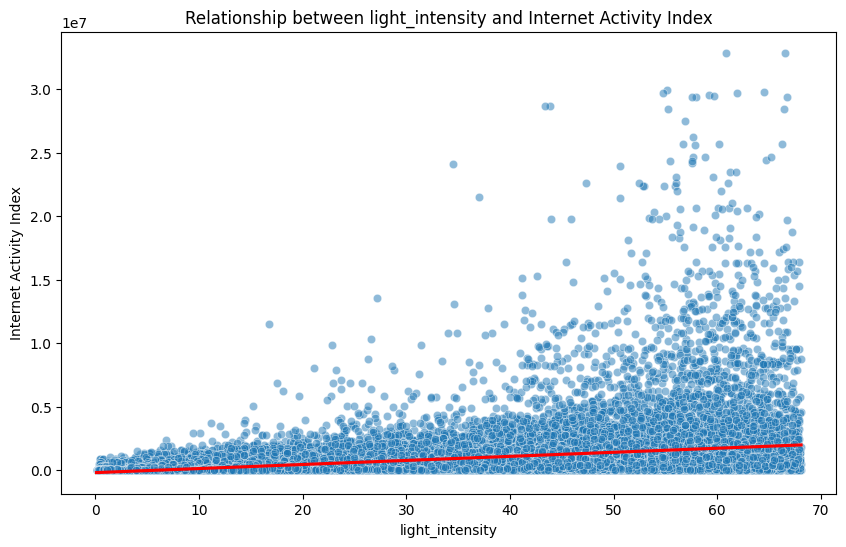

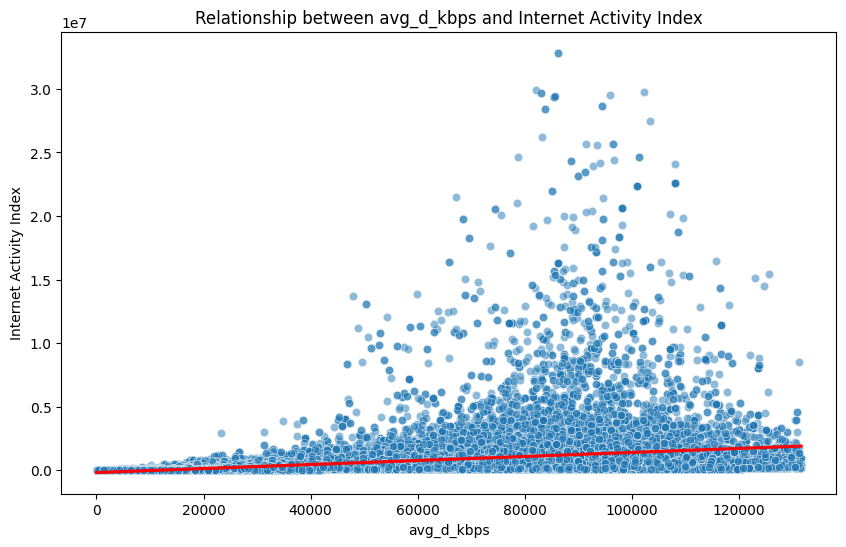

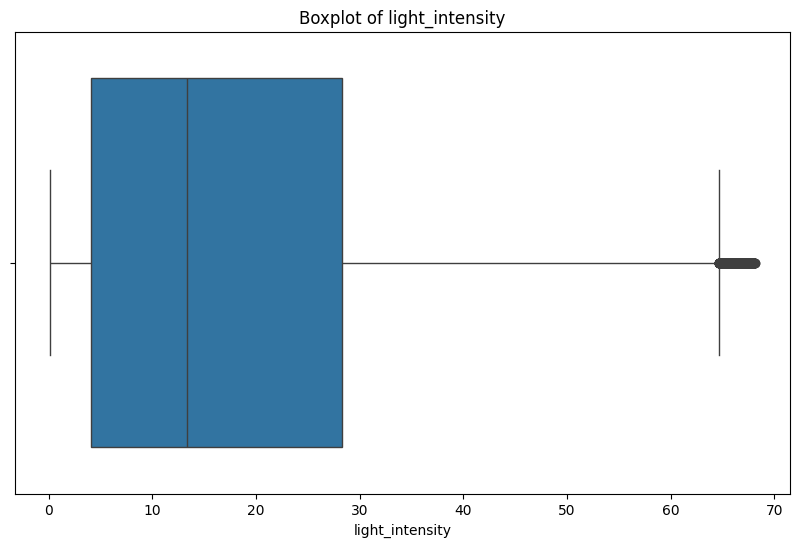

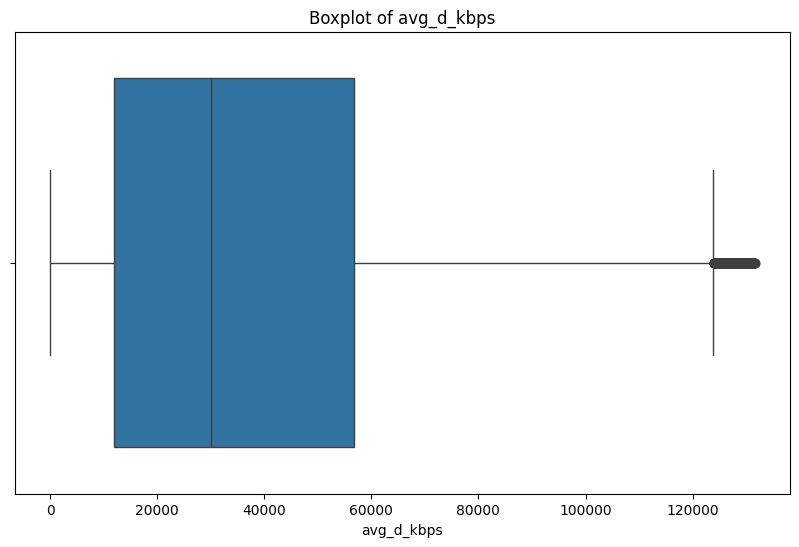

                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.233
Model:                                 OLS   Adj. R-squared:                  0.233
Method:                      Least Squares   F-statistic:                 1.285e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:21:42   Log-Likelihood:            -1.2915e+06
No. Observations:                    84523   AIC:                         2.583e+06
Df Residuals:                        84520   BIC:                         2.583e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [15]:
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

features = ['light_intensity', 'avg_d_kbps']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=mergin_cleaned_df[feature], y=mergin_cleaned_df['Internet_Activity_Index'], alpha=0.5)
    sns.regplot(x=mergin_cleaned_df[feature], y=mergin_cleaned_df['Internet_Activity_Index'], scatter=False, color='red', ci=None)
    plt.title(f"Relationship between {feature} and Internet Activity Index")
    plt.xlabel(feature)
    plt.ylabel("Internet Activity Index")
    plt.show()

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=mergin_cleaned_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()

def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for feature in features:
    mergin_cleaned_df = remove_outliers(mergin_cleaned_df, feature)

dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]
independent_variables = sm.add_constant(independent_variables)
model = sm.OLS(dependent_variable, independent_variables).fit()

print(model.summary())

print("\nCorrelation Analysis (After Removing Outliers):")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

print("\nInterpretation:")
print("- Visualizations help identify trends and outliers in the data.")
print("- Removing outliers can improve model accuracy.")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")


In [16]:
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

for column in ['light_intensity', 'avg_d_kbps']:
    mergin_cleaned_df[f'log_{column}'] = np.log1p(mergin_cleaned_df[column])

mergin_cleaned_df['interaction_radiance_download'] = (
    mergin_cleaned_df['light_intensity'] * mergin_cleaned_df['avg_d_kbps']
)

features = ['log_light_intensity', 'log_avg_d_kbps', 'interaction_radiance_download']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

independent_variables = sm.add_constant(independent_variables)

model = sm.OLS(dependent_variable, independent_variables).fit()

print(model.summary())

print("\nCorrelation Analysis After Log Transformation:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

print("\nInterpretation:")
print("- Log transformation can reduce skewness and improve model accuracy.")
print("- Interaction terms help capture synergistic effects between variables.")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")

                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.357
Model:                                 OLS   Adj. R-squared:                  0.357
Method:                      Least Squares   F-statistic:                 1.562e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:22:44   Log-Likelihood:            -1.2841e+06
No. Observations:                    84523   AIC:                         2.568e+06
Df Residuals:                        84519   BIC:                         2.568e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [18]:
mergin_cleaned_df['Internet_Activity_Index'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

for column in ['light_intensity', 'avg_d_kbps']:
    mergin_cleaned_df[column] = mergin_cleaned_df[column].replace([np.inf, -np.inf], np.nan)
    mergin_cleaned_df[column] = mergin_cleaned_df[column].fillna(1e-5)
    mergin_cleaned_df[f'log_{column}'] = np.log1p(mergin_cleaned_df[column])

mergin_cleaned_df['interaction_radiance_download'] = (
    mergin_cleaned_df['light_intensity'] * mergin_cleaned_df['avg_d_kbps']
)

mergin_cleaned_df = mergin_cleaned_df.replace([np.inf, -np.inf], np.nan).dropna()

features = ['log_light_intensity', 'log_avg_d_kbps', 'interaction_radiance_download']
dependent_variable = mergin_cleaned_df['Internet_Activity_Index']
independent_variables = mergin_cleaned_df[features]

independent_variables = sm.add_constant(independent_variables)

model = sm.OLS(dependent_variable, independent_variables).fit()

print(model.summary())

print("\nCorrelation Analysis After Log Transformation and Cleaning:")
for feature in features:
    correlation, p_value = pearsonr(mergin_cleaned_df[feature], mergin_cleaned_df['Internet_Activity_Index'])
    print(f"{feature} vs Internet_Activity_Index: Correlation = {correlation:.2f}, p-value = {p_value:.4f}")

print("\nInterpretation:")
print("- Missing and problematic values are handled to ensure clean regression analysis.")
print("- Log transformation reduces skewness, and interaction terms capture synergistic effects.")
print("- If the p-value in the regression or correlation analysis is less than 0.05, reject the null hypothesis.")

                               OLS Regression Results                              
Dep. Variable:     Internet_Activity_Index   R-squared:                       0.357
Model:                                 OLS   Adj. R-squared:                  0.357
Method:                      Least Squares   F-statistic:                 1.562e+04
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             08:23:46   Log-Likelihood:            -1.2841e+06
No. Observations:                    84523   AIC:                         2.568e+06
Df Residuals:                        84519   BIC:                         2.568e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------